### Task : Mask detection from images and videos 



- Libraries Used
-------------------------
         1 . Opencv
         2 . Pytorch
         3 . Darknet FrameWork
         4 . Yolo V4
         5 . Numpy
         6 . Pandas
         7 . matplotlib
        

### Maks Object Detection YOLO V4

In [78]:
import os 
import shutil

In [79]:
import cv2

In [80]:
net_v4 = cv2.dnn.readNetFromDarknet('files/yolov4-mask.cfg', 'files/yolov4_face_mask.weights')

In [81]:
classes = []
with open("files/classes.names",'r') as f:
    classes = [i.strip() for i in f.readlines()]

In [82]:
classes

['without_mask', 'with_mask']

In [83]:
img1 = cv2.imread("files/320.jpg")

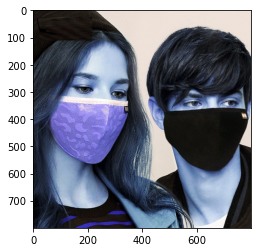

In [84]:
import matplotlib.pyplot as plt
plt.imshow(img1)

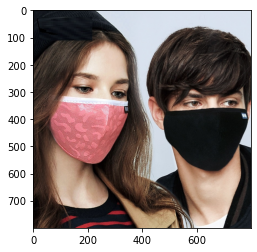

In [85]:
plt.imshow(img1[:,:,::-1])

In [86]:
ht,wt, _ = img1.shape

In [87]:
blob = cv2.dnn.blobFromImage(img1,1/255,(416,416),(0,0,0),swapRB = True , crop = False)

In [88]:
net_v4.setInput(blob)

In [89]:
last_layer = net_v4.getUnconnectedOutLayersNames()

In [90]:
layer_out = net_v4.forward(last_layer)

In [91]:
layer_out[0][0]

array([0.01096981, 0.01080165, 0.0243736 , 0.0252628 , 0.00025602,
       0.        , 0.        ], dtype=float32)

In [92]:
import numpy as np

In [93]:

boxes = []
confidences = []
class_ids = []

for i in layer_out:
    for j in i:
        score = j[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > .6:
            center_x = int(j[0] * wt)
            print(" X cordinated for highest label probability image = ",center_x)
            center_y = int(j[1] * ht)
            print(" Y cordinated for highest label probability image = ",center_y)
            w = int(j[2] * wt)
            h = int(j[3] * ht)
            x = int(center_x - w / 2)
            y = int(center_y - h/2)
            boxes.append([x , y , w , h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)





 X cordinated for highest label probability image =  204
 Y cordinated for highest label probability image =  392
 X cordinated for highest label probability image =  216
 Y cordinated for highest label probability image =  392
 X cordinated for highest label probability image =  205
 Y cordinated for highest label probability image =  400
 X cordinated for highest label probability image =  634
 Y cordinated for highest label probability image =  424
 X cordinated for highest label probability image =  646
 Y cordinated for highest label probability image =  424
 X cordinated for highest label probability image =  634
 Y cordinated for highest label probability image =  434
 X cordinated for highest label probability image =  205
 Y cordinated for highest label probability image =  392
 X cordinated for highest label probability image =  205
 Y cordinated for highest label probability image =  392
 X cordinated for highest label probability image =  634
 Y cordinated for highest label

In [94]:
indexces = cv2.dnn.NMSBoxes(boxes , confidences , .5 , .6)

In [95]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes) , 3))


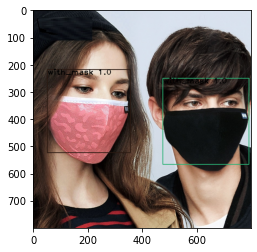

In [96]:
for k in indexces.flatten():
    x,y,w,h = boxes[k]
    label = str(classes[class_ids[k]])
    confidence = str(round(confidences[k],2))
    color = colors[k]
    cv2.rectangle(img1,(x , y) , (x+w , y+w),color,2)
    cv2.putText(img1,label+" "+confidence,(x,y+20),font,2,(0,0,0),2)

#cv2.imshow("img",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(img1[:,:,::-1])

### YOLO V4 For Web Cam 

In [98]:
cap = cv2.VideoCapture(0)

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net_v4.setInput(blob)

    output_layers_name = net_v4.getUnconnectedOutLayersNames()

    layerOutputs = net_v4.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            sol = cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)
            
    cv2.imshow("video",sol)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

### Object detection for videos 

In [106]:
cap = cv2.VideoCapture('files/testing5.mp4')

while 1:
    _, img = cap.read()
    img = cv2.resize(img,(1280,720))
    hight,width,_ = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255,(416,416),(0,0,0),swapRB = True,crop= False)

    net_v4.setInput(blob)

    output_layers_name = net_v4.getUnconnectedOutLayersNames()

    layerOutputs = net_v4.forward(output_layers_name)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.7:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)
                x = int(center_x - w/2)
                y = int(center_y - h/2)
                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)


    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.5,.4)

    boxes =[]
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            score = detection[5:]
            class_id = np.argmax(score)
            confidence = score[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * hight)
                w = int(detection[2] * width)
                h = int(detection[3]* hight)

                x = int(center_x - w/2)
                y = int(center_y - h/2)



                boxes.append([x,y,w,h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes,confidences,.8,.4)
    font = cv2.FONT_HERSHEY_PLAIN
    colors = np.random.uniform(0,255,size =(len(boxes),3))
    if  len(indexes)>0:
        for i in indexes.flatten():
            x,y,w,h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
            sol = cv2.putText(img,label + " " + confidence, (x,y+400),font,2,color,2)
            
    cv2.imshow("video",sol)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()